In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

1.1.1 Пример

In [2]:
def qZ(x, y):
  return (x - 3 * y + 1) / (3 * x ** 2 + 3 * y ** 2 + 1)

def qsumZ(Z):
  return sum(Z)

def exchangeScheme(oldX, oldY, sortedId):
  X = [0 for i in range(4)]
  Y = [0 for i in range(4)]
  X[2] = oldX[sortedId[2]]
  X[3] = oldX[sortedId[2]]

  X[0] = oldX[sortedId[0]]
  
  X[1] = oldX[sortedId[1]]

  Y[0] = oldY[sortedId[2]]
  Y[1] = oldY[sortedId[2]]

  Y[2] = oldY[sortedId[0]]

  Y[3] = oldY[sortedId[1]]

  return X, Y

def sorting(Z):
  sortedId = sorted(range(len(Z)), key = lambda k: Z[k])
  return sortedId

def evoStep(X, Y, Z):
  _, minId = min((value, id) for (id, value) in enumerate(Z))
  X = X[:]
  Y = Y[:]
  Z = Z[:]

  X.pop(minId)
  Y.pop(minId)
  Z.pop(minId)

  return X, Y, Z

def evoSteps(X, Y, stepsNum=4):
  results = []
  for i in range(stepsNum):
    arrZ = [qZ(x, Y[i]) for i, x in enumerate(X)]
    X, Y, Z = evoStep(X, Y, arrZ)
    X, Y = exchangeScheme(X, Y, sorting(Z))
    results.append([X, Y, qsumZ(arrZ), arrZ])
  return X, Y, results

In [3]:
x = [-2, -1, 0, 1]

y = [-2, -1, 0, 1]

results = evoSteps(x, y)

for i in range(len(results[2])):
  print(f"max {i+1} step: {results[2][i][2]}")

qualityArrZ = []
for i in range(len(results[2])):
  qualityArrZ += results[2][i][3]
print(f"max Z: {max(qualityArrZ)}")

max 1 step: 1.4857142857142858
max 2 step: 1.4615384615384615
max 3 step: 2.967032967032967
max 4 step: 3.5384615384615383
max Z: 1.0


Задание:

Выполните по вариантам соответственно реализацию генетического
алгоритма в соответствии с приложенными начальными данными.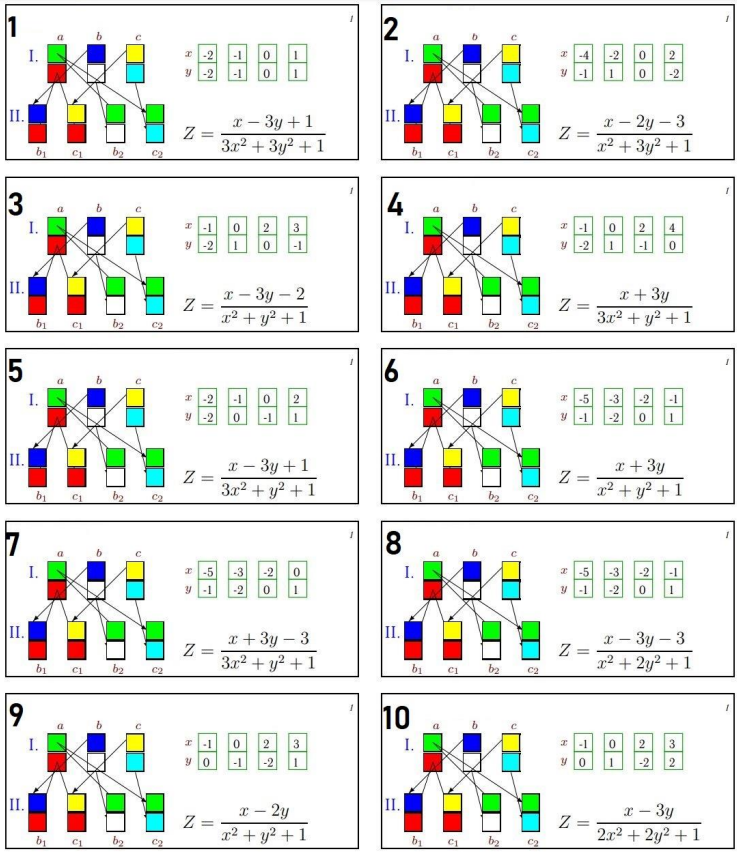

Вариант 2

x = [-4, -2, 0, 2]

y = [-1, 1, 0, -2]

Z = (x-2y-3)/(x^2+3y^2+1)

In [ ]:
def qZ(x, y):
  return (x - 2 * y - 3) / (x**2 + 3 * y**2 + 1)

def qsumZ(Z):
  return sum(Z)

def exchangeScheme(oldX, oldY, sortedId):
  X = [0 for i in range(4)]
  Y = [0 for i in range(4)]
  X[2] = oldX[sortedId[2]]
  X[3] = oldX[sortedId[2]]

  X[0] = oldX[sortedId[0]]
  
  X[1] = oldX[sortedId[1]]

  Y[0] = oldY[sortedId[2]]
  Y[1] = oldY[sortedId[2]]

  Y[2] = oldY[sortedId[0]]

  Y[3] = oldY[sortedId[1]]

  return X, Y

def sorting(Z):
  sortedId = sorted(range(len(Z)), key = lambda k: Z[k])
  return sortedId

def evoStep(X, Y, Z):
  _, minId = min((value, id) for (id, value) in enumerate(Z))
  X = X[:]
  Y = Y[:]
  Z = Z[:]

  X.pop(minId)
  Y.pop(minId)
  Z.pop(minId)

  return X, Y, Z

def evoSteps(X, Y, stepsNum=4):
  results = []
  for i in range(stepsNum):
    arrZ = [qZ(x, Y[i]) for i, x in enumerate(X)]
    X, Y, Z = evoStep(X, Y, arrZ)
    X, Y = exchangeScheme(X, Y, sorting(Z))
    results.append([X, Y, qsumZ(arrZ), arrZ])
  return X, Y, results

In [ ]:
x = [-4, -2, 0, 2]

y = [-1, 1, 0, -2]

results = evoSteps(x, y)

for i in range(len(results[2])):
  print(f"max {i+1} step: {results[2][i][2]}")

qualityArrZ = []
for i in range(len(results[2])):
  qualityArrZ += results[2][i][3]
print(f"max Z: {max(qualityArrZ)}")

max 1 step: -3.948529411764706
max 2 step: -0.41227180527383367
max 3 step: -0.2720588235294117
max 4 step: 0.37449290060851925
max Z: 0.17647058823529413


1.2.1 Пример

In [4]:
import networkx as nx
from math import e

In [15]:
distances = [(1, 2, 20),
             (1, 3, 40),
             (1, 4, 42),
             (1, 5, 33),
             (1, 6, 21),
             (2, 3, 26),
             (2, 4, 38),
             (2, 5, 42),
             (2, 6, 17),
             (3, 4, 22),
             (3, 5, 43),
             (3, 6, 21),
             (4, 5, 27),
             (4, 6, 22),
             (5, 6, 26),]
V = [1, 4, 5, 2, 6, 3, 1]
Z = [(3, 4), (4, 6), (5, 2), (6, 2)]
P = [49, 54, 43, 54]

T = 100

In [16]:
def probability(delta, T):
  return 100 * e ** (-delta / T)

def reductTemp(prevT):
  nextT = 0.5 * prevT
  return nextT

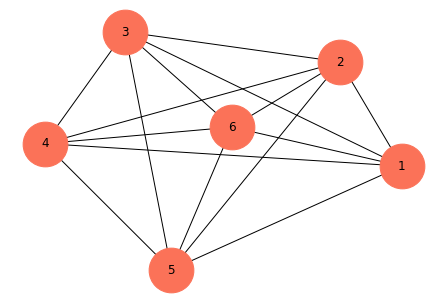

In [17]:
graph = nx.Graph()
graph.add_weighted_edges_from(distances)
nx.draw_kamada_kawai(graph, node_color = '#fb7258', with_labels=True, node_size=2000)

In [18]:
def edgeLength(i, j, distances, roundTrip = True):
  if roundTrip:
    return max([(item[2] if (item[0] == i and item[1] == j) or (item[1] == i and item[0] == j) else -1) for item in distances])
  else:
    return max([(item[2] if (item[0] == i and item[1] == j) else -1) for item in distances])

def routeLength(V, distances):
  edges = []
  for i in range(len(V) - 1):
    edges.append(edgeLength(V[i], V[i + 1], distances))
  return sum(edges)

def routeOneReplacement(arrV, Z, replacementByName = True):
  decrement = 1 if replacementByName else 0
  arrV[Z[0] - decrement], arrV[Z[1] - decrement] = arrV[Z[1] - decrement], arrV[Z[0] - decrement]
  return arrV

def routeReplacement(V, Z):
  for z in Z:
    V = routeOneReplacement(V, z)
  return V

def chooseRoute(distances, V, Z, T, P):
  sumLength = routeLength(V, distances)
  arrSum = [sumLength]

  for i in range(len(Z)):
    newV = routeOneReplacement(V[:], Z[i])
    newS = routeLength(newV, distances)
    arrSum.append(newS)
    deltaS = newS - sumLength

    if deltaS > 0:
      p = probability(deltaS, T)
      if p > P[i]:
        V = newV
        sumLength = newS
    else:
      V = newV
      sumLength = newS
    T = reductTemp(T)
  return V, arrSum

def drawRouteGraph(distances, bestRoute):
  newDistances = []
  for i in range(len(bestRoute) - 1):
    for distance in distances:
      if distance[0] == bestRoute[i] and distance[1] == bestRoute[i + 1] or distance[1] == bestRoute[i] and distance[0] == bestRoute[i + 1]:
        newDistances.append(distance)
  graph = nx.Graph()
  graph.add_weighted_edges_from(newDistances)
  nx.draw_kamada_kawai(graph, node_color = '#fb7258', node_size=2000, with_labels=True)

Лучший выбранный маршрут: [1, 6, 2, 3, 4, 5, 1]
Длина лучшего выбранного маршрута: 146
Длины всех рассмотренных маршрутов: [189, 209, 186, 146, 166]


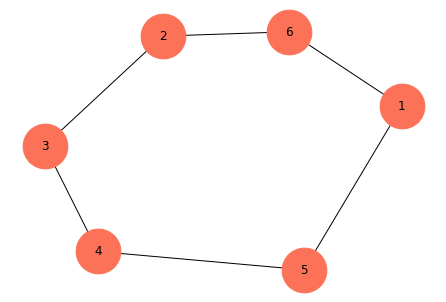

In [19]:
bestRoute, arrLength = chooseRoute(distances, V, Z, T, P)

print(f"Лучший выбранный маршрут: {bestRoute}")
print(f"Длина лучшего выбранного маршрута: {routeLength(bestRoute, distances)}")
print(f"Длины всех рассмотренных маршрутов: {arrLength}")

drawRouteGraph(distances, bestRoute)

Задание

Найти длину гамильтонова цикла S4 в полном графе K6 после четырех
циклов решения задачи методом отжига по вариантам ниже.
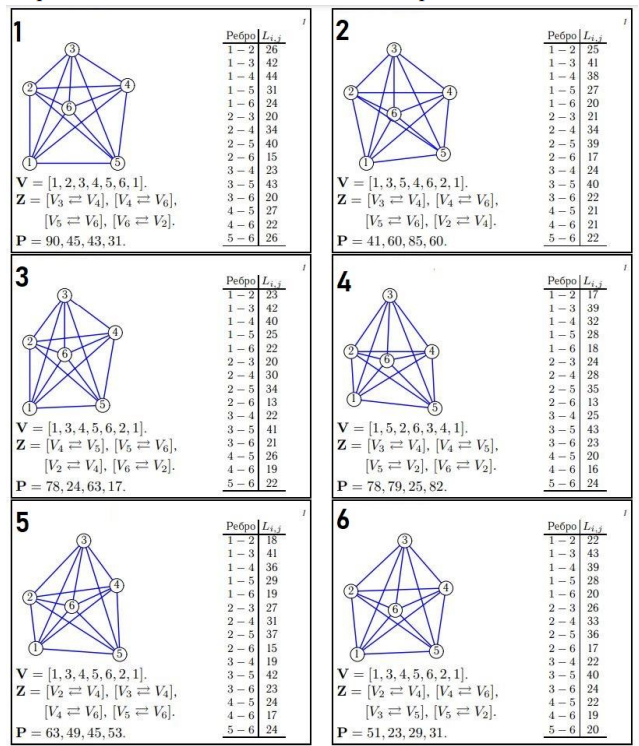

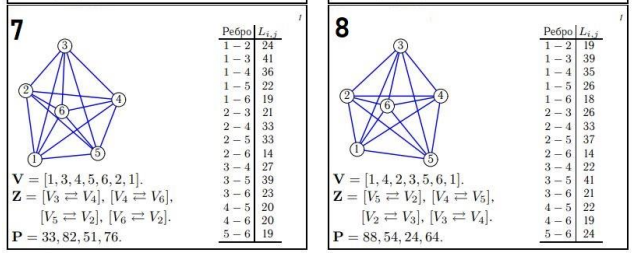

Вариант 2

v = [1, 3, 5, 4, 6, 2, 1]

z = [[v3, v4], [v4, v6], [v5, v6], [v2, v4]]

p = [41, 60, 85, 60]

In [ ]:
import networkx as nx

In [ ]:
distances = [(1, 2, 25),
             (1, 3, 41),
             (1, 4, 38),
             (1, 5, 27),
             (1, 6, 20),
             (2, 3, 21),
             (2, 4, 34),
             (2, 5, 39),
             (2, 6, 17),
             (3, 4, 24),
             (3, 5, 40),
             (3, 6, 22),
             (4, 5, 21),
             (4, 6, 21),
             (5, 6, 22),]
V = [1, 3, 5, 4, 6, 2, 1]
Z = [(3, 4), (4, 6), (5, 6), (2, 4)]
P = [41, 60, 85, 60]

T = 100

In [ ]:
def probability(delta, T):
  return 100 * np.e ** (-delta / T)

def reductTemp(prevT):
  return prevT / 2

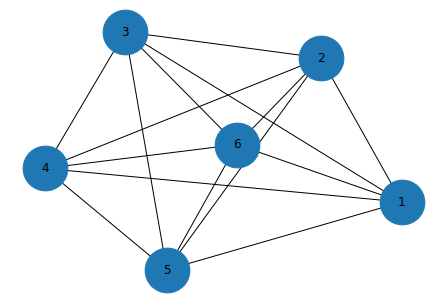

In [ ]:
graph = nx.Graph()
graph.add_weighted_edges_from(distances)
nx.draw_kamada_kawai(graph, with_labels=True, node_size=2000)

In [20]:
def edgeLength(i, j, distances, roundTrip = True):
  if roundTrip:
    return max([(item[2] if (item[0] == i and item[1] == j) or (item[1] == i and item[0] == j) else -1) for item in distances])
  else:
    return max([(item[2] if (item[0] == i and item[1] == j) else -1) for item in distances])

def routeLength(V, distances):
  edges = []
  for i in range(len(V) - 1):
    edges.append(edgeLength(V[i], V[i + 1], distances))
  return sum(edges)

def routeOneReplacement(arrV, Z, replacementByName = True):
  decrement = 1 if replacementByName else 0
  arrV[Z[0] - decrement], arrV[Z[1] - decrement] = arrV[Z[1] - decrement], arrV[Z[0] - decrement]
  return arrV

def routeReplacement(V, Z):
  for z in Z:
    V = routeOneReplacement(V, z)
  return V

def chooseRoute(distances, V, Z, T, P):
  sumLength = routeLength(V, distances)
  arrSum = [sumLength]

  for i in range(len(Z)):
    newV = routeOneReplacement(V[:], Z[i])
    newS = routeLength(newV, distances)
    arrSum.append(newS)
    deltaS = newS - sumLength

    if deltaS > 0:
      p = probability(deltaS, T)
      if p > P[i]:
        V = newV
        sumLength = newS
    else:
      V = newV
      sumLength = newS
    T = reductTemp(T)
  return V, arrSum

def drawRouteGraph(distances, bestRoute):
  newDistances = []
  for i in range(len(bestRoute) - 1):
    for distance in distances:
      if distance[0] == bestRoute[i] and distance[1] == bestRoute[i + 1] or distance[1] == bestRoute[i] and distance[0] == bestRoute[i + 1]:
        newDistances.append(distance)
  graph = nx.Graph()
  graph.add_weighted_edges_from(newDistances)
  nx.draw_kamada_kawai(graph, node_size=2000, with_labels=True)
    

Лучший выбранный маршрут: [1, 6, 2, 3, 4, 5, 1]
Длина лучшего выбранного маршрута: 146
Длины всех рассмотренных маршрутов: [189, 209, 186, 146, 166]


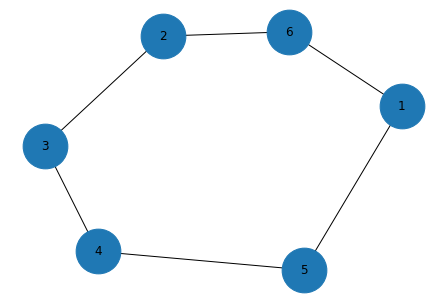

In [21]:
bestRoute, arrLength = chooseRoute(distances, V, Z, T, P)

print(f"Лучший выбранный маршрут: {bestRoute}")
print(f"Длина лучшего выбранного маршрута: {routeLength(bestRoute, distances)}")
print(f"Длины всех рассмотренных маршрутов: {arrLength}")

drawRouteGraph(distances, bestRoute)

Задание*:

На решенном уже примере поэкспериментируйте с показателем S,
проанализируйте результаты.

Рассмотрим случаи S0-S3, S4 рассмотрен выше

In [ ]:
for i in range(4):
  bestRoute, arrLength = chooseRoute(distances, V, Z[:i], T, P)

  print(f"Случай S{i}:")
  print(f"Лучший выбранный маршрут: {bestRoute}")
  print(f"Длина лучшего выбранного маршрута: {routeLength(bestRoute, distances)}")
  print(f"Длины всех рассмотренных маршрутов: {arrLength}")

  #plt.figure(i+1)
  #drawRouteGraph(distances, bestRoute)

Случай S0:
Лучший выбранный маршрут: [1, 3, 5, 4, 6, 2, 1]
Длина лучшего выбранного маршрута: 203
Длины всех рассмотренных маршрутов: [203]
Случай S1:
Лучший выбранный маршрут: [1, 3, 4, 5, 6, 2, 1]
Длина лучшего выбранного маршрута: 189
Длины всех рассмотренных маршрутов: [203, 189]
Случай S2:
Лучший выбранный маршрут: [1, 3, 4, 2, 6, 5, 1]
Длина лучшего выбранного маршрута: 184
Длины всех рассмотренных маршрутов: [203, 189, 184]
Случай S3:
Лучший выбранный маршрут: [1, 3, 4, 2, 6, 5, 1]
Длина лучшего выбранного маршрута: 184
Длины всех рассмотренных маршрутов: [203, 189, 184, 206]


Понятно, что начиная с S2 длина лучшего пути не меняется